In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')

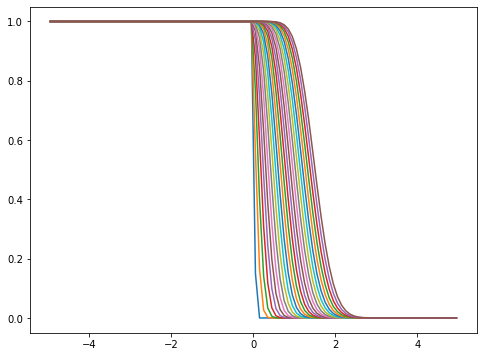

In [2]:
# Parameters
N       = 100  # Number of cells.
L       = 10   # Length of 1D domain.
v       = 1    # Advection parameter.
T       = 3    # Integration time.
N_steps = 100  # Number of timesteps.

# Initial conditions. 
threshold    = 0
q_init_left  = 1   # q(x,0) = q_init_left  for x < threshold
q_init_right = 0   # q(x,0) = q_init_right for x >= threshold

# Dirichlet boundary conditions at x = ±L/2.
q_left  = 1 
q_right = 0 

# -----------------------------------------------
# Timestep size and cell size. 
dt = T/N_steps 
dx = L/N

# Position vector (Not inlcuding ghost cells).
x = np.linspace(-(L-dx)/2, (L-dx)/2, N) 

# Pre-allocation (Including ghost cells).
q = np.zeros(N+2)

# Assign inital conditions.
q[1:-1][x < threshold]  = q_init_left
q[1:-1][x >= threshold] = q_init_right

# Apply boundary conditions. 
q[0]  = 2*q_left  - q[1]
q[-1] = 2*q_right - q[-2]

# Create plot.
plt.figure(figsize=(8,6))

# Main simulation loop.
t = 0
i = 0
while t < T: 
    # Take time step.
    #q[1:-1] = q[1:-1] - v*dt/dx*(q[2:] - q[:-2])/2     # symmetric
    
    q[1:-1] = q[1:-1] - v*dt/dx*(q[1:-1] - q[:-2])/2   # upwind

    #q[1:-1] = q[1:-1] - v*dt/dx*(q[2:] - q[1:-1])/2    # downwind

    
    # Apply boundary conditions.
    q[0]  = 2*q_left  - q[1]
    q[-1] = 2*q_right - q[-2]

    # Plot results.
    if i%4 == 0:
        plt.plot(x,q[1:-1])
    
    # Update time.
    t += dt
    i += 1
    
plt.show()